# Motor Imagery: Preprocessing and feature straction

**Authors**:

 - Mercedes Riveira mercedesriveira97@gmail.com | [@MercedesRiveira [in]](https://www.linkedin.com/in/mercedes-riveira-martin/)
 - Borja Sánchez Leirado borja.sanchez.leirado@gmail.com | [@BorjaSanchez [in]](https://www.linkedin.com/in/borjasanlei/)

---

_This code is Open Source, released under a GPL License._

In [1]:
import pandas as pd
import numpy as np
import mne
from scipy.signal import welch

## Loading data 

We load raw data as `mne.io.Raw` objects into a dictionary. Each key is a subject 

In [2]:
def raw(n=9):
    
    '''Function for loading data
    n = number of subjects'''
    
    raw_001 = {}
    path = '../data/vendor/bnci-001-2014/'
    for i in range(n):
        raw_001[str(i)] = mne.io.read_raw_fif(path + f'bnci-001-2014-{i+1}.fif', preload= True)
    
    return(raw_001)
    
raw_001 = raw()

#Example
raw_001['0']

Opening raw data file ../data/vendor/bnci-001-2014/bnci-001-2014-1.fif...
Isotrak not found
    Range : 0 ... 575999 =      0.000 ...  2303.996 secs
Ready.
Reading 0 ... 575999  =      0.000 ...  2303.996 secs...


<ipython-input-2-5c78264f72a3>:9: RuntimeWarning: This filename (../data/vendor/bnci-001-2014/bnci-001-2014-1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_001[str(i)] = mne.io.read_raw_fif(path + f'bnci-001-2014-{i+1}.fif', preload= True)


Opening raw data file ../data/vendor/bnci-001-2014/bnci-001-2014-2.fif...
Isotrak not found
    Range : 0 ... 575999 =      0.000 ...  2303.996 secs
Ready.
Reading 0 ... 575999  =      0.000 ...  2303.996 secs...


<ipython-input-2-5c78264f72a3>:9: RuntimeWarning: This filename (../data/vendor/bnci-001-2014/bnci-001-2014-2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_001[str(i)] = mne.io.read_raw_fif(path + f'bnci-001-2014-{i+1}.fif', preload= True)


Opening raw data file ../data/vendor/bnci-001-2014/bnci-001-2014-3.fif...
Isotrak not found
    Range : 0 ... 575999 =      0.000 ...  2303.996 secs
Ready.
Reading 0 ... 575999  =      0.000 ...  2303.996 secs...


<ipython-input-2-5c78264f72a3>:9: RuntimeWarning: This filename (../data/vendor/bnci-001-2014/bnci-001-2014-3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_001[str(i)] = mne.io.read_raw_fif(path + f'bnci-001-2014-{i+1}.fif', preload= True)


Opening raw data file ../data/vendor/bnci-001-2014/bnci-001-2014-4.fif...
Isotrak not found
    Range : 0 ... 575999 =      0.000 ...  2303.996 secs
Ready.
Reading 0 ... 575999  =      0.000 ...  2303.996 secs...


<ipython-input-2-5c78264f72a3>:9: RuntimeWarning: This filename (../data/vendor/bnci-001-2014/bnci-001-2014-4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_001[str(i)] = mne.io.read_raw_fif(path + f'bnci-001-2014-{i+1}.fif', preload= True)


Opening raw data file ../data/vendor/bnci-001-2014/bnci-001-2014-5.fif...
Isotrak not found
    Range : 0 ... 575999 =      0.000 ...  2303.996 secs
Ready.
Reading 0 ... 575999  =      0.000 ...  2303.996 secs...


<ipython-input-2-5c78264f72a3>:9: RuntimeWarning: This filename (../data/vendor/bnci-001-2014/bnci-001-2014-5.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_001[str(i)] = mne.io.read_raw_fif(path + f'bnci-001-2014-{i+1}.fif', preload= True)


Opening raw data file ../data/vendor/bnci-001-2014/bnci-001-2014-6.fif...
Isotrak not found
    Range : 0 ... 575999 =      0.000 ...  2303.996 secs
Ready.
Reading 0 ... 575999  =      0.000 ...  2303.996 secs...


<ipython-input-2-5c78264f72a3>:9: RuntimeWarning: This filename (../data/vendor/bnci-001-2014/bnci-001-2014-6.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_001[str(i)] = mne.io.read_raw_fif(path + f'bnci-001-2014-{i+1}.fif', preload= True)


Opening raw data file ../data/vendor/bnci-001-2014/bnci-001-2014-7.fif...
Isotrak not found
    Range : 0 ... 575999 =      0.000 ...  2303.996 secs
Ready.
Reading 0 ... 575999  =      0.000 ...  2303.996 secs...


<ipython-input-2-5c78264f72a3>:9: RuntimeWarning: This filename (../data/vendor/bnci-001-2014/bnci-001-2014-7.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_001[str(i)] = mne.io.read_raw_fif(path + f'bnci-001-2014-{i+1}.fif', preload= True)


Opening raw data file ../data/vendor/bnci-001-2014/bnci-001-2014-8.fif...
Isotrak not found
    Range : 0 ... 575999 =      0.000 ...  2303.996 secs
Ready.
Reading 0 ... 575999  =      0.000 ...  2303.996 secs...


<ipython-input-2-5c78264f72a3>:9: RuntimeWarning: This filename (../data/vendor/bnci-001-2014/bnci-001-2014-8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_001[str(i)] = mne.io.read_raw_fif(path + f'bnci-001-2014-{i+1}.fif', preload= True)


Opening raw data file ../data/vendor/bnci-001-2014/bnci-001-2014-9.fif...


<ipython-input-2-5c78264f72a3>:9: RuntimeWarning: This filename (../data/vendor/bnci-001-2014/bnci-001-2014-9.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_001[str(i)] = mne.io.read_raw_fif(path + f'bnci-001-2014-{i+1}.fif', preload= True)


Isotrak not found
    Range : 0 ... 575999 =      0.000 ...  2303.996 secs
Ready.
Reading 0 ... 575999  =      0.000 ...  2303.996 secs...


<Raw  |  bnci-001-2014-1.fif, n_channels x n_times : 22 x 576000 (2304.0 sec), ~96.7 MB, data loaded>

In [3]:
fig = raw_001['0'].plot(start = 0., duration = 50, scalings=0.5e-4, remove_dc=True)

<Figure size 640x480 with 4 Axes>

Effective window size : 8.192 (s)


<ipython-input-4-b2b00895cb44>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = raw_001['0'].plot_psd()


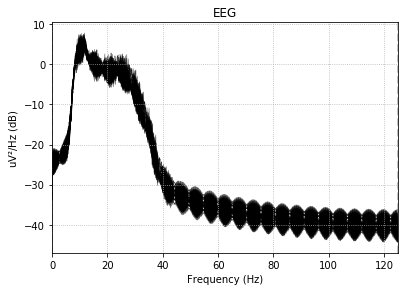

In [4]:
fig = raw_001['0'].plot_psd()

### Definitions

Some definitions to preprocess data and compute feature extractions.

In [5]:
def filters(raw, fmin = 0.5, fmax = 100., notch = 50., sampling_rate = 250, fir_design = 'firwin'):

    '''Apply high/low-pass and notch filters:
        
        === Args ===
        * raw - mne Raw object: object to apply filters on
        * fmin, fmax - float: bandpass frequencies
        * notch - float: powerline (AC current) frequecy
        * ny_freq - float: Nyquist frequency. Half of the sampling rate
        * fir_design: str: Notch filter type. See mne doc for more details
        * sampling_rate - int, float: sampling rate of the measured data
        
        === Returns ===
        * raw_c - mne Raw object: Processed Raw copy 
        '''
    raw_c = raw.copy()
    raw_c.filter(l_freq = fmin, h_freq = fmax)
    raw_c.notch_filter(np.arange(notch, sampling_rate/2, notch), fir_design=fir_design)
    return raw_c

In [6]:
def make_epochs(raw, tmin = 0.0, duration = 5, id_name = 333, sampling_rate = 250):
   
    '''Epoch data based on regular known events:
        
        === Args ===
        * raw - mne Raw object: object to epoch
        * tmin, (duration) - float: time in seconds as the origin (duration) of the epoch since the event
        * id - int: id name for the events
        * sampling_rate - int, float: sampling rate of the measured data
        === Returns ===
        * events - array: time ticks of the events
        * epochs - mne Epochs object: Epoched data
        * raw_c - mne Raw object: Processed Raw copy 
        '''
    
    raw_c = raw.copy()
    events = mne.make_fixed_length_events(raw_c, id = id_name, duration = duration-1/sampling_rate)
    #Reject trials
    epochs = mne.Epochs(raw_c, events, event_id = id_name, tmin=tmin, tmax=tmin+duration,
                        preload=True, baseline=None, verbose=True, reject = None)

    return events, epochs, raw_c

def plot_epochs(raw, events, epochs):
    raw.plot(events = events)
    

In [7]:
def convert_to_freq_domain(df, epoch = '0', n_channels = 22, sampling_rate = 250):
    
    '''Use Welch's method to obtain the Power Spectral Density (PSD):
        
        === Args ===
        * df - pandas DataFrame: df with the time series data for one epoch, with channels as columns and entries as rows
        * epoch - string: epoch to perform the operation to
        * n_channels - int: number of total channels
        * sampling_rate - int, float: sampling rate of the measured data
        === Returns ===
        * df - pandas DataFrame: df with channels as columns and rows as frequencies
        '''
        
    psd = {}
    freq = {}
    data_epoch = df.loc[epoch][df.columns[2:n_channels +2]].to_numpy()
    for i in range(data_epoch.shape[1]):
        freq[str(i)], psd[str(i)] = welch(data_epoch[:,i], fs = sampling_rate, nfft=4*sampling_rate)
    
    df = pd.DataFrame(psd)
    df['Frequencies'] = freq['0']
    return df
        

In [8]:
def compute_average(df, fmin = 7, fmax = 14):
    
    '''Extract the feature of each channel as mean the value of the PSD for one epoch:
        
        === Args ===
        * df - pandas DataFrame: df with the PSD, with channels as columns and frequencies as rows
        * fmin, fmax - float, int: min and max frequencies of the selected band
        === Returns ===
        * df - pandas Series: one column with the features of each channel
        '''
    
    df_sel = df[(df.Frequencies >= fmin) & (df.Frequencies <= fmax)].copy()
    df_sel.drop('Frequencies', inplace = True, axis = 1)
    means = df_sel.apply(np.mean, axis=0, result_type = 'expand')
    return means

### Pipeline

We gather all the functions in one pipeline for processing and another for feature extraction.

In [9]:
def prep_pipeline(raw, *karg):
    raw_filtered = filters(raw, *karg)
    events, epochs, raw_epochs = make_epochs(raw_filtered, *karg)
    
    return events, epochs.to_data_frame(index=['epoch']), raw_epochs

In [10]:
def feature_pipeline(df, *kargs):
    features_df = {}
    for epoch in pd.unique(epochs.index):
        psd_df = convert_to_freq_domain(df, epoch = epoch, *kargs)
        features_df[epoch] = compute_average(psd_df, *kargs)
    return(pd.DataFrame(features_df).transpose())

# Implementation: feature extraction

A dictionary with one key for each subject the features as DataFrame one column for each channel and one row for each epoch. <p style="color: red"> **Caution** Features are written to disk. Do not run this cell without pourpose.</p>

In [11]:
epochs = epochs[:,2:]


NameError: name 'epochs' is not defined

In [12]:
features = {}
path = './data/2-processing/'

for subject in raw_001.keys():
    events, epochs, raw_epochs = prep_pipeline(raw_001[subject])
    features[subject] = feature_pipeline(epochs)
    features[subject].to_csv(path + f'bnci-001-2014-{int(subject)+1}-features.csv', index_label = 'Epoch')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 sec)

461 matching events found
No baseline correction appl

In [13]:
features['5']

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2.167581,3.426829,2.056041,5.233704,6.246639,3.847330,2.126929,4.455921,2.318850,4.516169,...,2.570109,1.573853,2.372723,3.603282,3.775675,3.655322,1.857866,2.386808,4.876256,2.131553
1,2.286932,2.903660,2.620711,4.946314,6.429371,3.164492,3.126523,5.282325,3.362371,4.495163,...,1.669731,1.820067,2.779944,4.465696,3.288023,4.495321,1.991164,4.808770,5.188109,2.328153
2,2.574341,2.597749,5.863200,3.997129,3.444902,1.983111,3.492304,4.459735,2.084132,5.267618,...,1.400343,2.398930,2.842517,5.533196,2.493940,5.381064,1.647889,2.340632,3.915180,2.802799
3,2.527227,2.752639,3.271963,4.499915,4.194930,1.720427,1.931339,5.840651,2.256686,4.460566,...,2.393902,2.064548,3.810552,5.287906,2.607712,2.213593,1.951353,1.821163,3.169183,4.544237
4,2.660662,2.736390,2.399926,6.618839,2.592258,1.917715,2.190970,8.683971,1.677710,3.708881,...,2.796283,1.906075,3.606595,5.424534,3.107031,2.691250,3.679304,1.884995,5.010917,3.285796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,3.864782,2.927929,5.741506,5.389801,2.805156,3.577272,4.693634,2.028735,4.241980,4.379573,...,1.970893,2.578524,3.202571,3.826832,3.970728,3.431860,1.587527,4.051352,5.478138,6.594219
457,4.123582,3.197198,4.424530,10.228284,3.125583,2.298539,4.237538,1.952974,4.558093,2.153762,...,2.418842,3.993204,5.222561,3.936606,3.917410,1.543044,2.380056,5.227430,3.465648,5.999241
458,2.302256,3.950007,5.590954,6.048245,4.241305,2.656585,4.101373,1.653032,5.933283,1.878308,...,1.793119,3.421106,2.223038,4.736650,3.969636,1.564041,1.588852,4.150009,1.955202,4.181571
459,2.418445,2.503523,6.052881,4.212416,4.704814,1.972016,4.725167,2.755503,5.886500,1.842467,...,1.643942,3.874180,4.037019,4.514313,3.212998,1.777161,2.564174,3.613985,2.360954,5.782028
